In [41]:
#importing pandas libraray
import pandas as pd
#reading the dataset
data = pd.read_csv( "/content/eps_AA.csv")
data.head()

,TICKER,CNAME,ACTDATS,ESTIMATOR,ANALYS,FPI,MEASURE,VALUE,FPEDATS,REVDATS,REVTIMS,ANNDATS,ANNTIMS,ACTUAL,ANNDATS_ACT,ANNTIMS_ACT
0,AA,ALCOA,19950112,118.0,288.0,1.0,EPS,2.2313,19951231.0,19950228.0,13:49:55,19950112.0,11:06:14,3.375,19960108.0,18:42:00
1,AA,ALCOA INC.,20111005,2488.0,18082.0,1.0,EPS,2.7600,20111231.0,20111011.0,10:30:27,20111004.0,7:04:00,2.160,20120109.0,16:03:00
2,AA,ALCOA INC.,20111006,1267.0,73367.0,1.0,EPS,2.9400,20111231.0,20111006.0,19:18:18,20111006.0,17:55:00,2.160,20120109.0,16:03:00
3,AA,ALCOA INC.,20111010,11.0,107166.0,1.0,EPS,3.5700,20111231.0,20111010.0,16:06:23,20111010.0,15:11:00,2.160,20120109.0,16:03:00
4,AA,ALCOA INC.,20111011,118.0,112989.0,1.0,EPS,2.6100,20111231.0,20111011.0,10:28:04,20111010.0,20:30:00,2.160,20120109.0,16:03:00


In [42]:
# Display the first few rows of the dataset
# to understand its structure
data.head(), data.info(), data.describe(), data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TICKER       2845 non-null   object 
 1   CNAME        2845 non-null   object 
 2   ACTDATS      2845 non-null   int64  
 3   ESTIMATOR    2845 non-null   float64
 4   ANALYS       2845 non-null   float64
 5   FPI          2845 non-null   float64
 6   MEASURE      2845 non-null   object 
 7   VALUE        2845 non-null   float64
 8   FPEDATS      2845 non-null   float64
 9   REVDATS      2845 non-null   float64
 10  REVTIMS      2845 non-null   object 
 11  ANNDATS      2845 non-null   float64
 12  ANNTIMS      2845 non-null   object 
 13  ACTUAL       2801 non-null   float64
 14  ANNDATS_ACT  2801 non-null   float64
 15  ANNTIMS_ACT  2801 non-null   object 
dtypes: float64(9), int64(1), object(6)
memory usage: 355.8+ KB


(  TICKER       CNAME   ACTDATS  ESTIMATOR    ANALYS  FPI MEASURE   VALUE  \
 0     AA       ALCOA  19950112      118.0     288.0  1.0     EPS  2.2313   
 1     AA  ALCOA INC.  20111005     2488.0   18082.0  1.0     EPS  2.7600   
 2     AA  ALCOA INC.  20111006     1267.0   73367.0  1.0     EPS  2.9400   
 3     AA  ALCOA INC.  20111010       11.0  107166.0  1.0     EPS  3.5700   
 4     AA  ALCOA INC.  20111011      118.0  112989.0  1.0     EPS  2.6100   
 
       FPEDATS     REVDATS   REVTIMS     ANNDATS   ANNTIMS  ACTUAL  \
 0  19951231.0  19950228.0  13:49:55  19950112.0  11:06:14   3.375   
 1  20111231.0  20111011.0  10:30:27  20111004.0   7:04:00   2.160   
 2  20111231.0  20111006.0  19:18:18  20111006.0  17:55:00   2.160   
 3  20111231.0  20111010.0  16:06:23  20111010.0  15:11:00   2.160   
 4  20111231.0  20111011.0  10:28:04  20111010.0  20:30:00   2.160   
 
    ANNDATS_ACT ANNTIMS_ACT  
 0   19960108.0    18:42:00  
 1   20120109.0    16:03:00  
 2   20120109.0    16:03

#**Data Cleaning**  

In [43]:
#Checking null values in dataset
null_counts = data.isnull().sum()
print(null_counts)

TICKER          0
CNAME           0
ACTDATS         0
ESTIMATOR       0
ANALYS          0
FPI             0
MEASURE         0
VALUE           0
FPEDATS         0
REVDATS         0
REVTIMS         0
ANNDATS         0
ANNTIMS         0
ACTUAL         44
ANNDATS_ACT    44
ANNTIMS_ACT    44
dtype: int64


In [44]:
# Remove rows with missing values
clean_data = data.dropna()

In [45]:
null_values = clean_data.isnull().sum()
# Display the results
print("Null Values in Dataset:\n", null_values)

Null Values in Dataset:
 TICKER         0
CNAME          0
ACTDATS        0
ESTIMATOR      0
ANALYS         0
FPI            0
MEASURE        0
VALUE          0
FPEDATS        0
REVDATS        0
REVTIMS        0
ANNDATS        0
ANNTIMS        0
ACTUAL         0
ANNDATS_ACT    0
ANNTIMS_ACT    0
dtype: int64


In [46]:
# Convert the 'REVDATS' column to datetime format for accurate sorting
clean_data['REVDATS'] = pd.to_datetime(clean_data['REVDATS'], format='%Y%m%d')
clean_data['FPEDATS'] = pd.to_datetime(clean_data['FPEDATS'], format='%Y%m%d')
clean_data['ANNDATS_ACT'] = pd.to_datetime(clean_data['ANNDATS_ACT'], format='%Y%m%d')


# Sort data by 'ANALYS', 'FPEDATS' (fiscal year), and 'REVDATS' (revision date), and then keep the last entry
clean_data = clean_data.sort_values(by=['ANALYS', 'FPEDATS', 'REVDATS'], ascending=[True, True, False])
clean_data = clean_data.drop_duplicates(subset=['ANALYS', 'FPEDATS'], keep='first')



<ipython-input-46-e2aeedcdd114>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['REVDATS'] = pd.to_datetime(clean_data['REVDATS'], format='%Y%m%d')
<ipython-input-46-e2aeedcdd114>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['FPEDATS'] = pd.to_datetime(clean_data['FPEDATS'], format='%Y%m%d')
<ipython-input-46-e2aeedcdd114>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [47]:
# Validate that for each analyst and fiscal year, the date kept is the maximum date
grouped = clean_data.groupby(['ANALYS', 'FPEDATS'])
max_dates = grouped['REVDATS'].transform('max')
assert all(clean_data['REVDATS'] == max_dates), "Not all entries are the most recent per group"

# Display the cleaned data
print(clean_data.head())
print(clean_data.info())

     TICKER       CNAME   ACTDATS  ESTIMATOR  ANALYS  FPI MEASURE   VALUE  \
1813     AA       ALCOA  19951227       16.0   127.0  1.0     EPS  3.4950   
2071     AA       ALCOA  19961008       16.0   127.0  1.0     EPS  2.7375   
2103     AA       ALCOA  19971224       16.0   127.0  1.0     EPS  3.4050   
1544     AA       ALCOA  19981007       16.0   127.0  1.0     EPS  3.6000   
1432     AA  ALCOA INC.  19991007       16.0   127.0  1.0     EPS  4.0950   

        FPEDATS    REVDATS   REVTIMS     ANNDATS   ANNTIMS  ACTUAL  \
1813 1995-12-31 1998-01-09  17:09:26  19951227.0  10:21:39  3.3750   
2071 1996-12-31 1999-01-08  15:50:40  19961008.0  16:40:06  2.7375   
2103 1997-12-31 2000-01-14  15:31:10  19971224.0  14:01:01  3.3375   
1544 1998-12-31 2000-06-26  16:17:09  19981007.0  13:32:22  3.6525   
1432 1999-12-31 1999-12-02  12:52:09  19991007.0  10:19:11  4.2300   

     ANNDATS_ACT ANNTIMS_ACT  
1813  1996-01-08    18:42:00  
2071  1997-01-08    19:04:00  
2103  1998-01-08    20:

# **Feature Engineering**

In [48]:
#Calculating past_accuracy
# Convert FPEDATS to datetime and extract the year
clean_data['FPEDATS'] = pd.to_datetime(clean_data['FPEDATS'], format='%Y%m%d', errors='coerce').dt.year

# Sort the data by analyst, company, and fiscal year
clean_data.sort_values(by=['ANALYS', 'CNAME', 'FPEDATS'], inplace=True)

# Calculate past_accuracy as the difference between last year's VALUE and this year's ACTUAL
clean_data['past_accuracy'] = clean_data.groupby(['ANALYS', 'CNAME'])['VALUE'].shift(1) - clean_data['ACTUAL']

# Remove rows where 'past_accuracy' is NaN
clean_data.dropna(subset=['past_accuracy'], inplace=True)

# Display to check the values
print(clean_data[['ANALYS', 'CNAME', 'FPEDATS', 'VALUE', 'ACTUAL', 'past_accuracy']].head())


      ANALYS       CNAME  FPEDATS   VALUE  ACTUAL  past_accuracy
2071   127.0       ALCOA     1996  2.7375  2.7375         0.7575
2103   127.0       ALCOA     1997  3.4050  3.3375        -0.6000
1544   127.0       ALCOA     1998  3.6000  3.6525        -0.2475
1486   127.0  ALCOA INC.     2000  6.3750  5.4450        -1.3500
1786   281.0       ALCOA     1996  4.1250  2.7375         0.6375


In [49]:
# Ensure both ANNDATS_ACT and ANNDATS are in datetime format
clean_data['ANNDATS_ACT'] = pd.to_datetime(clean_data['ANNDATS_ACT'], format='%Y%m%d', errors='coerce')
clean_data['ANNDATS'] = pd.to_datetime(clean_data['ANNDATS'], format='%Y%m%d', errors='coerce')

# Now calculate the forecast horizon
clean_data['horizon'] = (clean_data['ANNDATS_ACT'] - clean_data['ANNDATS']).dt.days

# Check the results
print(clean_data[['ANNDATS_ACT', 'ANNDATS', 'horizon']].head())



     ANNDATS_ACT    ANNDATS  horizon
2071  1997-01-08 1996-10-08       92
2103  1998-01-08 1997-12-24       15
1544  1999-01-08 1998-10-07       93
1486  2001-01-08 2000-04-10      273
1786  1997-01-08 1996-01-31      343


In [50]:
# Calculate brokerage house size
clean_data['size'] = clean_data.groupby(['ESTIMATOR', 'CNAME', 'FPEDATS'])['ANALYS'].transform('nunique')
# Display a few rows to check the 'size' values
print(clean_data[['ESTIMATOR', 'CNAME', 'FPEDATS', 'ANALYS', 'size']].head())


      ESTIMATOR       CNAME  FPEDATS  ANALYS  size
2071       16.0       ALCOA     1996   127.0     1
2103       16.0       ALCOA     1997   127.0     1
1544       16.0       ALCOA     1998   127.0     1
1486       16.0  ALCOA INC.     2000   127.0     1
1786      231.0       ALCOA     1996   281.0     1


In [51]:
# Calculate analyst experience
clean_data['experience'] = clean_data.groupby(['ANALYS', 'CNAME'])['FPEDATS'].transform(lambda x: x.rank(method='dense')).astype(int)
# Display a few rows to check the 'experience' values
print(clean_data[['ANALYS', 'CNAME', 'FPEDATS', 'experience']].head())


      ANALYS       CNAME  FPEDATS  experience
2071   127.0       ALCOA     1996           1
2103   127.0       ALCOA     1997           2
1544   127.0       ALCOA     1998           3
1486   127.0  ALCOA INC.     2000           1
1786   281.0       ALCOA     1996           1


In [52]:
# Validate and display the cleaned data with new features
print(clean_data[['past_accuracy', 'horizon', 'experience', 'size']].head())
print(clean_data.info())


      past_accuracy  horizon  experience  size
2071         0.7575       92           1     1
2103        -0.6000       15           2     1
1544        -0.2475       93           3     1
1486        -1.3500      273           1     1
1786         0.6375      343           1     1
<class 'pandas.core.frame.DataFrame'>
Index: 345 entries, 2071 to 913
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TICKER         345 non-null    object        
 1   CNAME          345 non-null    object        
 2   ACTDATS        345 non-null    int64         
 3   ESTIMATOR      345 non-null    float64       
 4   ANALYS         345 non-null    float64       
 5   FPI            345 non-null    float64       
 6   MEASURE        345 non-null    object        
 7   VALUE          345 non-null    float64       
 8   FPEDATS        345 non-null    int32         
 9   REVDATS        345 non-null    datetime64[ns]
 10

# **Descriptive Statistics**

In [53]:
# Assuming 'clean_data' is your cleaned and processed DataFrame
descriptive_stats = clean_data[['MEASURE', 'ACTUAL', 'past_accuracy', 'horizon', 'experience', 'size']].describe()

# Print the descriptive statistics
print(descriptive_stats)

           ACTUAL  past_accuracy     horizon  experience        size
count  345.000000     345.000000  345.000000   345.00000  345.000000
mean     3.403797       0.115459   93.286957     2.97971    1.034783
std      2.447899       2.336796   99.483617     2.51094    0.183495
min     -2.400000      -4.770000    0.000000     1.00000    1.000000
25%      2.110000      -1.140000   20.000000     1.00000    1.000000
50%      3.300000      -0.130000   78.000000     2.00000    1.000000
75%      4.620000       1.020000  111.000000     4.00000    1.000000
max      8.880000       7.452000  546.000000    13.00000    2.000000


# **Exploratory Data Analysis**

In [54]:
#Downloading necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

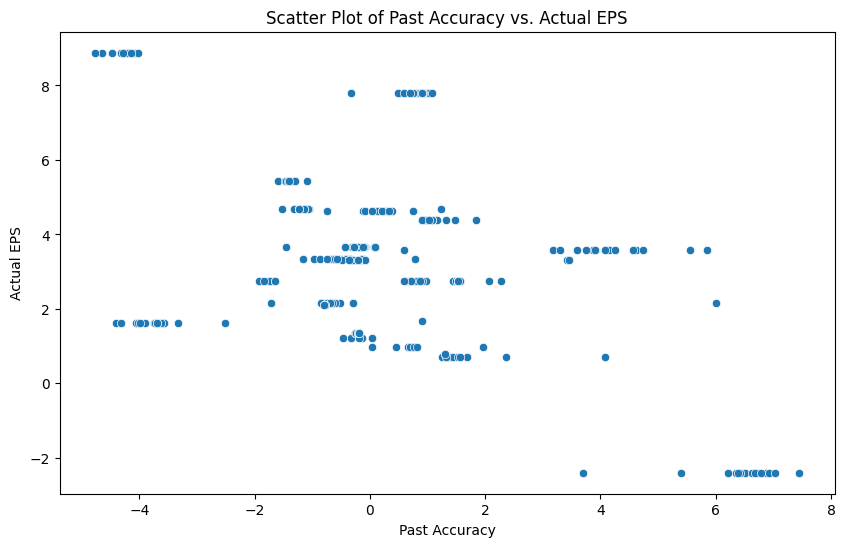

In [55]:
# Scatter plot for 'past_accuracy' vs. 'ACTUAL'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='past_accuracy', y='ACTUAL', data=clean_data)
plt.title('Scatter Plot of Past Accuracy vs. Actual EPS')
plt.xlabel('Past Accuracy')
plt.ylabel('Actual EPS')
plt.show()

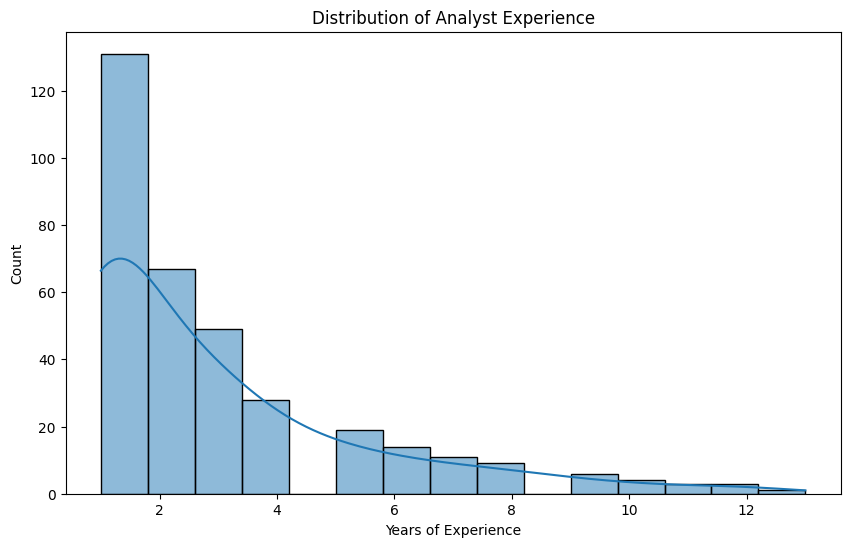

In [56]:
# Histogram for 'experience'
plt.figure(figsize=(10, 6))
sns.histplot(clean_data['experience'], kde=True)
plt.title('Distribution of Analyst Experience')
plt.xlabel('Years of Experience')
plt.show()


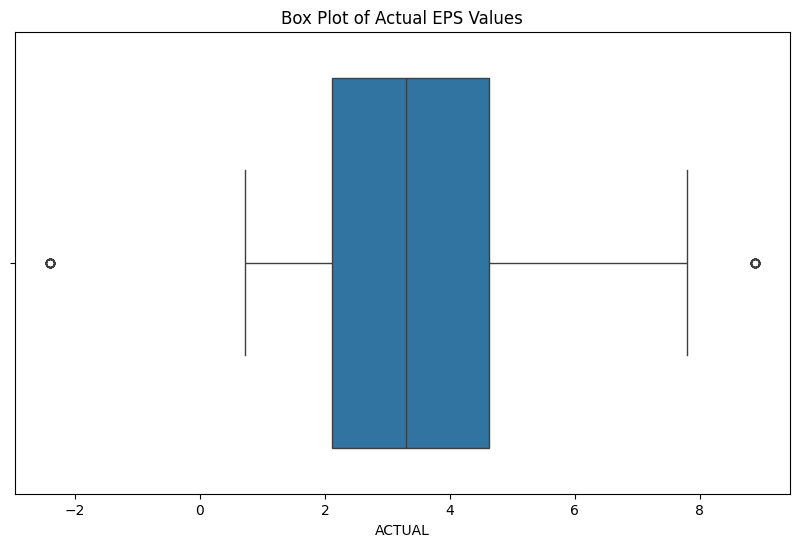

In [57]:
# Box plot for 'actual'
plt.figure(figsize=(10, 6))
sns.boxplot(x='ACTUAL', data=clean_data)
plt.title('Box Plot of Actual EPS Values')
plt.show()


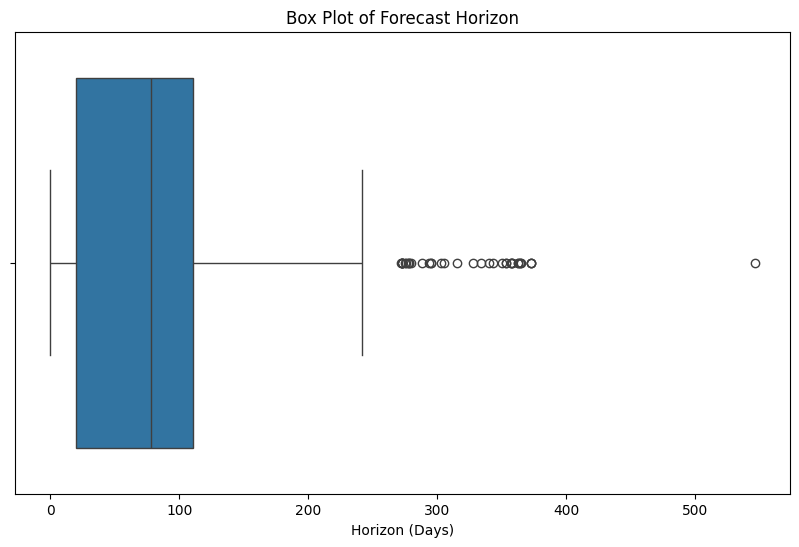

In [58]:
# box plot for horizon

plt.figure(figsize=(10, 6))
sns.boxplot(x='horizon', data=clean_data)
plt.title('Box Plot of Forecast Horizon')
plt.xlabel('Horizon (Days)')
plt.show()


In [59]:
# Apply one-hot encoding
clean_data = pd.get_dummies(clean_data, columns=['TICKER', 'MEASURE', 'CNAME'])

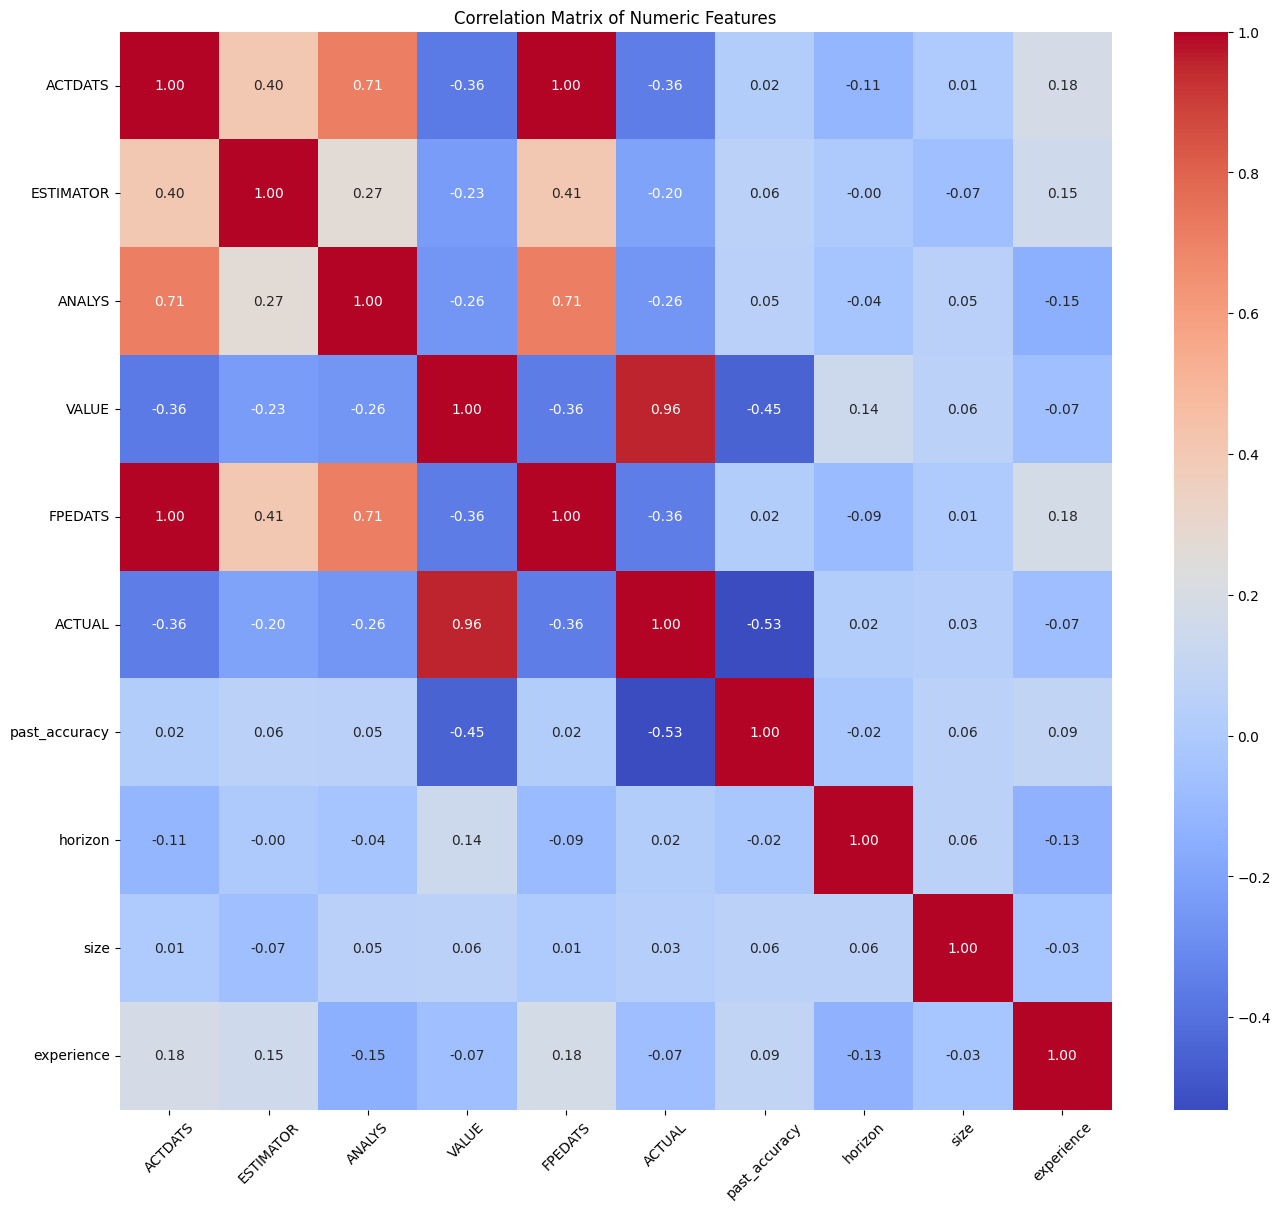

In [60]:
# Exclude non-numeric columns explicitly
numeric_cols = clean_data.select_dtypes(include=[np.number]).drop(columns=['FPI']) # Only select columns that are numeric

# Recalculate the correlation matrix for the DataFrame
correlation_matrix = numeric_cols.corr()

# Visualize the correlation matrix with annotations
plt.figure(figsize=(16, 14))  # Increase the figure size for better visibility
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, annot_kws={'size':10})
plt.title('Correlation Matrix of Numeric Features')
plt.xticks(rotation=45)  # Rotate x labels for better readability if necessary
plt.yticks(rotation=0)
plt.show()

In [61]:
# Calculate current accuracy by subtracting the actual EPS from the forecasted EPS
clean_data['current_accuracy'] = clean_data['VALUE'] - clean_data['ACTUAL']

# Display the first few rows to ensure the calculation was successful
print(clean_data[['ANALYS', 'FPEDATS', 'VALUE', 'ACTUAL', 'current_accuracy']].head())


      ANALYS  FPEDATS   VALUE  ACTUAL  current_accuracy
2071   127.0     1996  2.7375  2.7375            0.0000
2103   127.0     1997  3.4050  3.3375            0.0675
1544   127.0     1998  3.6000  3.6525           -0.0525
1486   127.0     2000  6.3750  5.4450            0.9300
1786   281.0     1996  4.1250  2.7375            1.3875


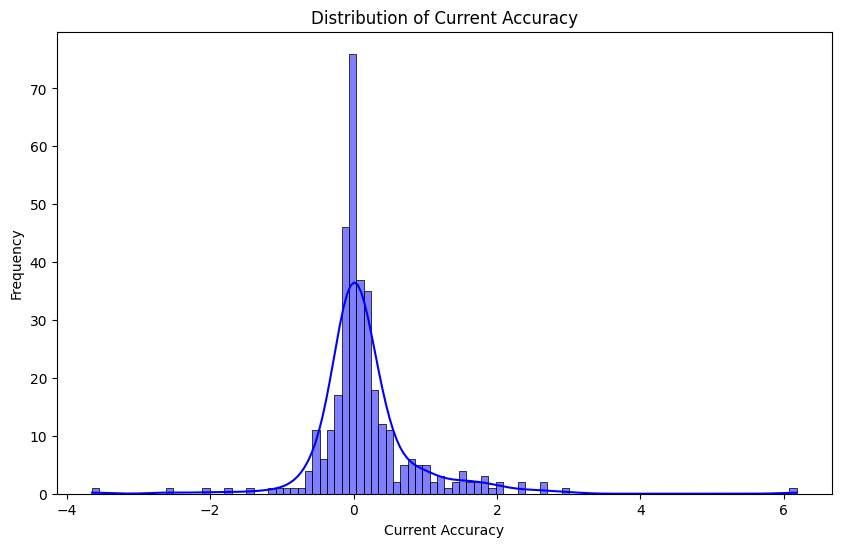

In [62]:


# Plotting the distribution of current accuracy
plt.figure(figsize=(10, 6))
sns.histplot(clean_data['current_accuracy'], kde=True, color='blue')
plt.title('Distribution of Current Accuracy')
plt.xlabel('Current Accuracy')
plt.ylabel('Frequency')
plt.show()


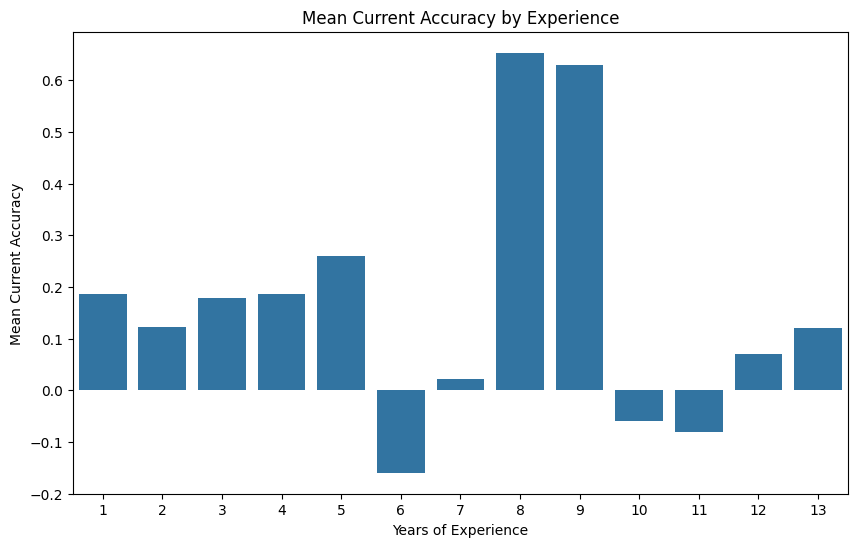

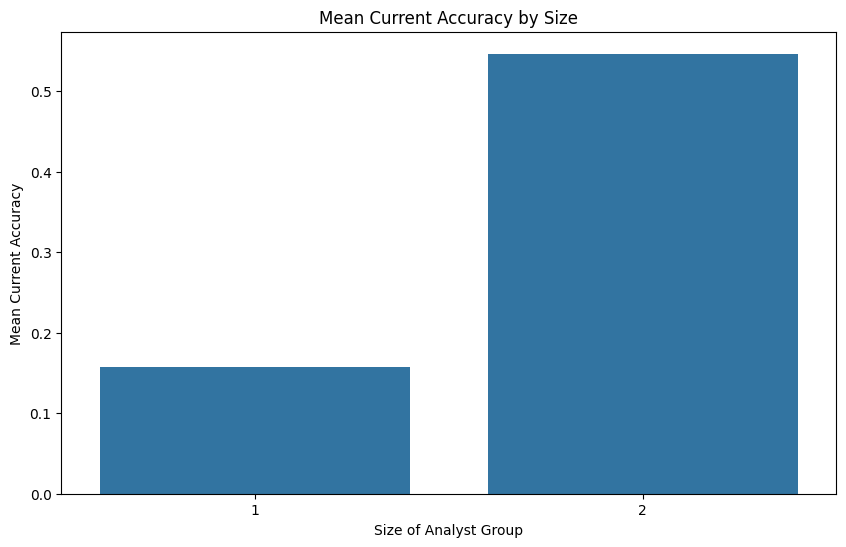

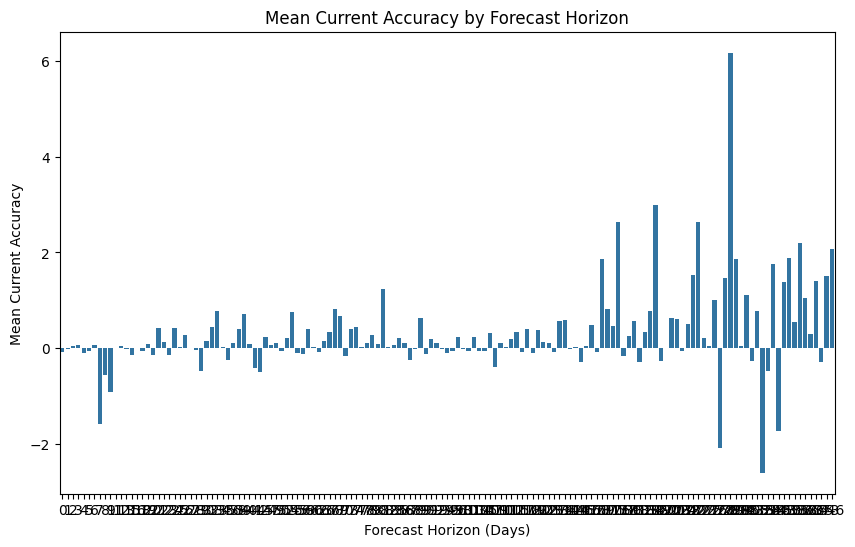

In [63]:
# Ensure 'current_accuracy' exists and calculate mean accuracy for different groups
mean_accuracy_by_experience = clean_data.groupby('experience')['current_accuracy'].mean()
mean_accuracy_by_size = clean_data.groupby('size')['current_accuracy'].mean()
mean_accuracy_by_horizon = clean_data.groupby('horizon')['current_accuracy'].mean()


# Visualize Mean Current Accuracy by Experience
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_accuracy_by_experience.index, y=mean_accuracy_by_experience.values)
plt.title('Mean Current Accuracy by Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Mean Current Accuracy')
plt.show()

# Visualize Mean Current Accuracy by Size
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_accuracy_by_size.index, y=mean_accuracy_by_size.values)
plt.title('Mean Current Accuracy by Size')
plt.xlabel('Size of Analyst Group')
plt.ylabel('Mean Current Accuracy')
plt.show()

# Visualize Mean Current Accuracy by Horizon
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_accuracy_by_horizon.index, y=mean_accuracy_by_horizon.values)
plt.title('Mean Current Accuracy by Forecast Horizon')
plt.xlabel('Forecast Horizon (Days)')
plt.ylabel('Mean Current Accuracy')
plt.show()



# **Splitting the dataset into TrainData and TestData**

In [64]:
# Extract the year from FPEDATS
clean_data['year'] = clean_data['FPEDATS'].astype(str).str.slice(0, 4).astype(int)


In [65]:
# Find the unique years in the dataset
unique_years = clean_data['year'].unique()

# Assuming the years are sorted, find the split year
split_year = sorted(unique_years)[-4]  # Get the fourth-last unique year


In [66]:
# Create the train_data and test_data splits
train_data = clean_data[clean_data['year'] < split_year]
test_data = clean_data[clean_data['year'] >= split_year]


In [67]:
# Verify the train_data range
train_years = train_data['year'].unique()
print(f"Training data years: {sorted(train_years)}")

# Verify the test_data range
test_years = test_data['year'].unique()
print(f"Testing data years: {sorted(test_years)}")


Training data years: [1996, 1997, 1998, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2014, 2015, 2016]
Testing data years: [2017, 2018, 2019, 2020]


In [68]:
# Print the data types of all columns
print(train_data.dtypes)


ACTDATS                      int64
ESTIMATOR                  float64
ANALYS                     float64
FPI                        float64
VALUE                      float64
FPEDATS                      int32
REVDATS             datetime64[ns]
REVTIMS                     object
ANNDATS             datetime64[ns]
ANNTIMS                     object
ACTUAL                     float64
ANNDATS_ACT         datetime64[ns]
ANNTIMS_ACT                 object
past_accuracy              float64
horizon                      int64
size                         int64
experience                   int64
TICKER_AA                     bool
MEASURE_EPS                   bool
CNAME_ALCOA                   bool
CNAME_ALCOA INC               bool
CNAME_ALCOA INC.              bool
CNAME_ARCONIC                 bool
current_accuracy           float64
year                         int64
dtype: object


In [69]:
# Check for columns with NaN values
nan_columns = train_data.columns[train_data.isna().any()].tolist()

# Print out the columns that have NaN values
print(f"Columns with NaN values: {nan_columns}")


Columns with NaN values: []


#**Modeling**

### **Backward Selection and Linear Regression**

In [70]:
import pandas as pd
import statsmodels.api as sm


# Dropping 'current_accuracy' from predictors
train_data = train_data.drop(columns=['current_accuracy'])


# Selecting only numeric columns for predictors
predictor_columns = train_data.select_dtypes(include=['int64', 'float64']).columns.drop(['ACTUAL'])

# Prepare your predictors (X) and response (y)
X = train_data[predictor_columns]
y = train_data['ACTUAL']

# Define a function for backward elimination
def backward_elimination(X, y, significance_level=0.05):
    features = X.columns.tolist()
    while len(features) > 0:
        # Fit the model with the current set of features
        X_with_constant = sm.add_constant(X[features])
        p_values = sm.OLS(y, X_with_constant).fit().pvalues[1:]  # exclude the intercept
        # Find the feature with the largest p-value
        max_p_value = p_values.max()
        # If the feature has a p-value greater than the significance level, drop it
        if max_p_value >= significance_level:
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features

# Perform backward elimination
selected_features = backward_elimination(X, y)

# Fit the model using the selected features
X_selected = sm.add_constant(X[selected_features])
linearModel_Team1 = sm.OLS(y, X_selected).fit()

# Print the summary of the model
print(linearModel_Team1.summary())

# Document the selected features
print("Selected features based on backward elimination:", selected_features)



                            OLS Regression Results                            
Dep. Variable:                 ACTUAL   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     971.1
Date:                Fri, 10 May 2024   Prob (F-statistic):          2.25e-187
Time:                        22:59:34   Log-Likelihood:                -292.57
No. Observations:                 317   AIC:                             597.1
Df Residuals:                     311   BIC:                             619.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
ACTDATS       -1.714e-06   6.85e-07     -2.504

### **KNN and Cross-Validation**

Optimal k value: 3
Average RMSE for each k: [(1, 1.0560580135017112), (3, 1.0145862389492148), (5, 1.1464976567517218), (7, 1.2546019907937926), (9, 1.3178889000587144), (11, 1.391343195006397), (13, 1.4207958251321862), (15, 1.4712443052994906), (17, 1.4981098226664102), (19, 1.5311610466521028)]


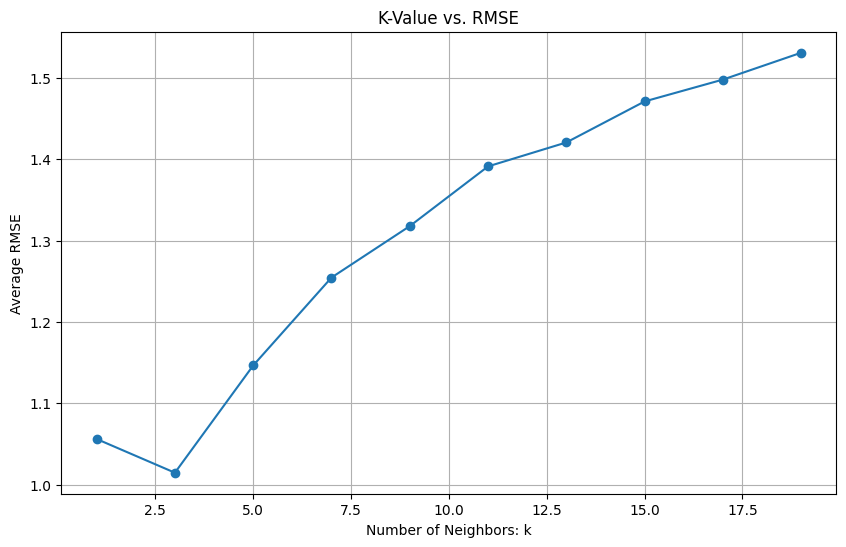

KNN model fitted with optimal k.


In [71]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

import matplotlib.pyplot as plt

# Define predictors and response, excluding non-predictive and target column
X_train = train_data[predictor_columns]
y_train = train_data['ACTUAL']

# List to store average RMSE for different k values
average_rmse = []

# Try k from 1 to a reasonable upper limit, stepping by 2 (only odd k values)
k_values = range(1, 21, 2)
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    # Perform cross-validation
    scores = cross_val_score(knn, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
    rmse_scores = np.sqrt(-scores)
    average_rmse.append(rmse_scores.mean())

# Determine the best k (having the lowest RMSE)
optimal_k = k_values[np.argmin(average_rmse)]
print(f"Optimal k value: {optimal_k}")

# Fit the model with optimal k
knnModel_Team1 = KNeighborsRegressor(n_neighbors=optimal_k)
knnModel_Team1.fit(X_train, y_train)
print(f"Average RMSE for each k: {list(zip(k_values, average_rmse))}")

# Plot RMSE vs. k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, average_rmse, marker='o')
plt.xlabel('Number of Neighbors: k')
plt.ylabel('Average RMSE')
plt.title('K-Value vs. RMSE')
plt.grid(True)
plt.show()

# Print a statement to confirm model training
print("KNN model fitted with optimal k.")


### **Lasso**

In [72]:
from sklearn.linear_model import Lasso, LassoCV

# Lasso regression with cross-validation to find the best alpha
lasso = LassoCV(alphas=np.logspace(-6, 6, 13), cv=10)  # Explore wide range of alpha
lasso.fit(X_train, y_train)

# Optimal alpha value
optimal_alpha = lasso.alpha_
print(f"Optimal alpha value: {optimal_alpha}")

# Final Lasso Model
lassoModel_Team1 = Lasso(alpha=optimal_alpha)
lassoModel_Team1.fit(X_train, y_train)


Optimal alpha value: 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56.80943422144469, tolerance: 0.19277938446491227
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56.529827423036735, tolerance: 0.19277938446491227
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56.5031442669473, tolerance: 0.19277938446491227
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: Converge

Lasso(alpha=0.01)

### **Random Forest**

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {'max_features': range(1, len(predictor_columns)+1)}

# Create Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Conduct grid search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best max_features
optimal_max_features = grid_search.best_params_['max_features']
print(f"Optimal max_features: {optimal_max_features}")

# Final Random Forest Model
RFModel_Team1 = RandomForestRegressor(n_estimators=100, max_features=optimal_max_features, random_state=42)
RFModel_Team1.fit(X_train, y_train)


Optimal max_features: 3


RandomForestRegressor(max_features=3, random_state=42)

# **Calculating MSPE, MSE, r2_SCROCE, MAE Metrix**

In [74]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# Prepare test data
X_test = test_data[predictor_columns]
y_test = test_data['ACTUAL']

# Predict using each model
y_pred_linear = linearModel_Team1.predict(sm.add_constant(X_test[selected_features]))
y_pred_knn = knnModel_Team1.predict(X_test)
y_pred_lasso = lassoModel_Team1.predict(X_test)
y_pred_rf = RFModel_Team1.predict(X_test)

# Calculate RMSE for each model
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))


# Calculate MAE for each model
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mae_rf = mean_absolute_error(y_test, y_pred_rf)


# Calculate R-squared for each model
r2_linear = r2_score(y_test, y_pred_linear)
r2_knn = r2_score(y_test, y_pred_knn)
r2_lasso = r2_score(y_test, y_pred_lasso)
r2_rf = r2_score(y_test, y_pred_rf)


# Calculate MSE for each model
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Calculate Squared Percentage Error for each model
def calculate_mspe(y_true, y_pred):
    # Handling division by zero or very small values in actual by adding a small number (epsilon)
    epsilon = np.finfo(float).eps
    squared_percentage_errors = ((y_true - y_pred) / (y_true + epsilon)) ** 2
    return np.mean(squared_percentage_errors)

# Calculating MSPE for each model
mspe_linear = calculate_mspe(y_test, y_pred_linear)
mspe_knn = calculate_mspe(y_test, y_pred_knn)
mspe_lasso = calculate_mspe(y_test, y_pred_lasso)
mspe_rf = calculate_mspe(y_test, y_pred_rf)



# Print the metrics
print("RMSE (linear, KNN, Lasso, RF):", rmse_linear, rmse_knn, rmse_lasso, rmse_rf)
print("MAE (linear, KNN, Lasso, RF):", mae_linear, mae_knn, mae_lasso, mae_rf)
print("R-squared (linear, KNN, Lasso, RF):", r2_linear, r2_knn, r2_lasso, r2_rf)
print("MSE (Linear, KNN, Lasso, RF):", mse_linear, mse_knn, mse_lasso, mse_rf)
print("MSPE (Linear, KNN, Lasso, RF):", mspe_linear, mspe_knn, mspe_lasso, mspe_rf)



RMSE (linear, KNN, Lasso, RF): 0.22604471848767863 0.6712908082242368 0.24163393444242526 0.2660861757897779
MAE (linear, KNN, Lasso, RF): 0.18075039834917808 0.5660714285714286 0.2046773473117624 0.1835517857142858
R-squared (linear, KNN, Lasso, RF): 0.7613798446573863 -1.1044557422304555 0.7273319536517859 0.6693541932755338
MSE (Linear, KNN, Lasso, RF): 0.051096214756173874 0.45063134920634906 0.05838695827412627 0.07080185294642859
MSPE (Linear, KNN, Lasso, RF): 0.03564689507103718 0.1555992018785088 0.038625181767404204 0.08885211927827827


In [75]:
# Create a DataFrame to store the results
model_results = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN', 'Lasso', 'Random Forest'],
    'RMSE': [rmse_linear, rmse_knn, rmse_lasso, rmse_rf],
    'MAE': [mae_linear, mae_knn, mae_lasso, mae_rf],
    'R-squared': [r2_linear, r2_knn, r2_lasso, r2_rf],
    'MSE': [mse_linear, mse_knn, mse_lasso, mse_rf],
    'MSPE': [mspe_linear, mspe_knn, mspe_lasso, mspe_rf]
})

# Print the results DataFrame
print(model_results.to_string())


               Model      RMSE       MAE  R-squared       MSE      MSPE
0  Linear Regression  0.226045  0.180750   0.761380  0.051096  0.035647
1                KNN  0.671291  0.566071  -1.104456  0.450631  0.155599
2              Lasso  0.241634  0.204677   0.727332  0.058387  0.038625
3      Random Forest  0.266086  0.183552   0.669354  0.070802  0.088852


In [76]:
# Convert the 'Model' column to categorical data type
model_results['Model'] = model_results['Model'].astype('category')

# Find the best model based on the 'MSPE' column
best_model = model_results.loc[model_results['MSPE'].idxmin()]

# Print the best model
print(f"Best Model: {best_model['Model']}")


Best Model: Linear Regression


#**MSPE of Censensus**

In [77]:
# Assuming 'test_data' contains columns 'year' and 'ACTUAL' where 'ACTUAL' represents the EPS
consensus_forecast = test_data.groupby('year')['ACTUAL'].mean().reset_index(name='ConsensusForecast')
print(consensus_forecast)

# Merge the consensus forecast back to the test data using the 'year' column as a key
test_data_with_consensus = test_data.merge(consensus_forecast, on='year', how='left')
print(test_data_with_consensus.head())





   year  ConsensusForecast
0  2017               1.22
1  2018               1.36
2  2019               2.11
3  2020               0.80
    ACTDATS  ESTIMATOR   ANALYS  FPI  VALUE  FPEDATS    REVDATS   REVTIMS  \
0  20181102       11.0  31736.0  1.0   1.33     2018 2019-01-11  12:23:56   
1  20191126       11.0  31736.0  1.0   2.11     2019 2020-01-10   8:03:53   
2  20181030      282.0  43401.0  1.0   1.30     2018 2018-11-13   6:45:10   
3  20171023      157.0  73867.0  1.0   1.13     2017 2017-12-01  18:05:27   
4  20181220     2301.0  77011.0  1.0   1.30     2018 2018-12-20   0:03:57   

     ANNDATS   ANNTIMS  ...  experience TICKER_AA MEASURE_EPS  CNAME_ALCOA  \
0 2018-11-02   8:04:00  ...           1      True        True        False   
1 2019-11-26   8:01:00  ...           2      True        True        False   
2 2018-10-30  16:17:00  ...           1      True        True        False   
3 2017-10-23  22:25:00  ...           1      True        True        False   
4 2018-12-20

In [78]:
# Calculate MSPE for the consensus forecast
mspe_consensus = ((test_data_with_consensus['ACTUAL'] - test_data_with_consensus['ConsensusForecast']) ** 2 / test_data_with_consensus['ACTUAL'] ** 2).mean()
print(f"Consensus Forecast MSPE: {mspe_consensus}")

Consensus Forecast MSPE: 2.0634963689863236e-33
